<a href="https://colab.research.google.com/github/Jegovila/cursoVR/blob/main/Practica7%3A%20Operaciones%20morfol%C3%B3gicas/python/Pr%C3%A1ctica7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc "https://raw.githubusercontent.com/Jegovila/cursoVR/main/Practica1%3A%20Fundamentos%20del%20PDI/data/lena.bmp"

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
src = cv2.imread("lena.bmp")                                    # Leer
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)                     # Escala grises
_, src_bin = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)     # Binaria
cv2_imshow(src_bin)

# Erosión y dilatación

In [ ]:
kernel = np.ones((5, 5), np.uint8)

Erosión

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,14))
fig.tight_layout()

plt.subplot(1,3,1)
plt.imshow(255 - src_bin, cmap="binary")
plt.subplot(1,3,2)
plt.imshow(255 - cv2.erode(src_bin, kernel, iterations=1), cmap="binary")
plt.subplot(1,3,3)
plt.imshow(255 - cv2.erode(src_bin, kernel, iterations=2), cmap="binary")

Dilatación

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,14))
fig.tight_layout()

plt.subplot(1,3,1)
plt.imshow(255 - src_bin, cmap="binary")
plt.subplot(1,3,2)
plt.imshow(255 - cv2.dilate(src_bin, kernel, iterations=1), cmap="binary")
plt.subplot(1,3,3)
plt.imshow(255 - cv2.dilate(src_bin, kernel, iterations=2), cmap="binary")

Erosión y dilatación

In [ ]:
im_out = cv2.erode(src_bin, kernel, iterations=1)      # Erosion
im_out = cv2.dilate(im_out, kernel, iterations=1)    # Dilatacion

fig, ax = plt.subplots(1, 3, figsize=(10,7))
fig.tight_layout()
plt.clf()
plt.subplot(1,3,1)
plt.imshow(255 - src_bin, cmap="binary")
plt.subplot(1,3,2)
plt.imshow(255 - im_out, cmap="binary")
plt.title("1 iteración")

im_out = cv2.erode(src_bin, kernel, iterations=2)      # Erosion
im_out = cv2.dilate(im_out, kernel, iterations=2)    # Dilatacion
plt.subplot(1,3,3)
plt.imshow(255 - im_out, cmap="binary")
plt.title("2 iteraciones")

Apertura

In [ ]:
im_open1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel)

im_open3 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel)
im_open3 = cv2.morphologyEx(im_open3, cv2.MORPH_OPEN, kernel)
im_open3 = cv2.morphologyEx(im_open3, cv2.MORPH_OPEN, kernel)

fig, ax = plt.subplots(1, 3, figsize=(10,7))
fig.tight_layout()
plt.clf()
plt.subplot(1,3,1)
plt.imshow(255 - src_bin, cmap="binary")
plt.subplot(1,3,2)
plt.imshow(255 - im_open1, cmap="binary")
plt.title("1 apertura")
plt.subplot(1,3,3)
plt.imshow(255 - im_open3, cmap="binary")
plt.title("3 aperturas")

Cierre

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,7))
fig.tight_layout()
plt.clf()
plt.subplot(1,3,1)
plt.imshow(255 - src_bin, cmap="binary")
plt.subplot(1,3,2)
plt.imshow(255 - cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel), cmap="binary")

# Detección de bordes

In [ ]:
src = cv2.imread("lena.bmp")                                    # Leer
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)                     # Escala grises

n = 7
h = np.ones((n, n), np.float32)/(n*n)

src_s = cv2.filter2D(src, -1, h)

kernel = np.ones((2, 2), np.uint8)

_, src_bin = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)      # sin suavizar
_, src_bin_s = cv2.threshold(src_s, 120, 255, cv2.THRESH_BINARY)   # suavizada

# Sin suavizar
srcE = cv2.erode(src_bin, kernel, iterations=1)
srcE_inv = cv2.bitwise_not(srcE)
I_bordes = cv2.bitwise_and(srcE_inv, src_bin)

srcE_s = cv2.erode(src_bin_s, kernel, iterations=1)
srcE_inv_s = cv2.bitwise_not(srcE_s)
I_bordes_s = cv2.bitwise_and(srcE_inv_s, src_bin_s)

fig, ax = plt.subplots(1, 2, figsize=(10,7))
fig.tight_layout()
plt.clf()
plt.subplot(1,2,1)
plt.imshow(255 - I_bordes, cmap="binary")
plt.title("Sin suavizar")
plt.subplot(1,2,2)
plt.imshow(255 - I_bordes_s, cmap="binary")
plt.title("Suavizada")

# Detección de movimiento

### Función para leer webcam

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

### Captura de imágenes

Captura de imagen de referencia

In [ ]:
from IPython.display import Image
try:
  filename = take_photo("ref.jpg")
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Captura imagen nueva

In [ ]:
try:
  filename = take_photo("actual.jpg")
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Detector

In [25]:
params = cv2.SimpleBlobDetector_Params()
# # Change thresholds
# params.minThreshold = 10
# params.maxThreshold = 200

# Filter by Area.
params.filterByArea = False
params.minArea = 15

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

### Detección de movimiento

Objetos:  1


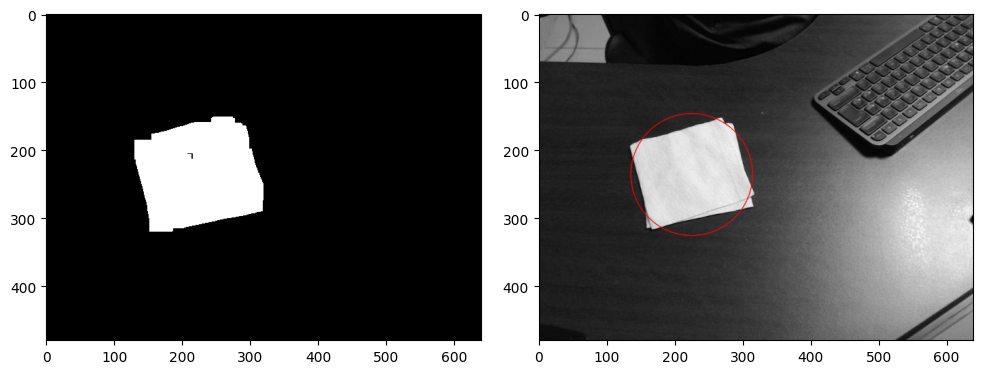

In [26]:
ref = cv2.imread("ref.jpg", cv2.IMREAD_GRAYSCALE)
actual = cv2.imread("actual.jpg", cv2.IMREAD_GRAYSCALE)

I_diff = np.abs(ref - actual)
_, I_diff_bin = cv2.threshold(I_diff, 80, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)
im_salida = cv2.erode(I_diff_bin, kernel, iterations=3)
im_salida = cv2.dilate(im_salida, kernel, iterations=6)

im_salida = cv2.bitwise_not(im_salida)        # Detecta los blobs negros
keypoints = detector.detect(im_salida)
nblobs = len(keypoints)
print("Objetos: ", nblobs)
im_with_keypoints = cv2.drawKeypoints(actual, keypoints, np.array([]), (255, 0, 0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(1, 2, figsize=(10,7))
fig.tight_layout()
plt.clf()
plt.subplot(1,2,1)
plt.imshow(im_salida, cmap="binary")
plt.subplot(1,2,2)
plt.imshow(im_with_keypoints)